# Benchmark Applications for memory centric model with HLS

#### We capture the data from different benchmarks, the time execution model can be found her first version in FCCM 2020 as "An Analytical Model of Memory-Bound Applications Compiled with High Level Synthesis"

#### Benchmark are categorized in the LSU type with information from ocl reports:
 1) Burst Coalesced Aligned (BCA)
 2) Burst Coalesced Non-Aligned (BCN)
 3) Burst Coalesced Write-Acknoledge (WACK)

#### Each benchmark was evaluated with two or three memory technologies:
##### 1) DDR 1866, with Fmem=933.33MHz, dq=8B, bl=8B,TRCD=TRP=13.5ns
##### 1) DDR 2666, with Fmem=1333.33MHz, dq=8B, bl=8B,TRCD=TRP=13.5ns
##### 2) HBM2, with Fmem=800MHz, dq=8B, bl=4B, TRCD=TRP=145ns
 
### Variables
#### LSU : is the number of load/store units
#### WD : is the ls_width of the LSU units
#### Time : Execution time of the benchmark measured with internal counters using -profile compilation
#### delta : memory stride of lsu units
#### ls_byte: variable word size (4B - float, 4B- uint, 1B- Char)
#### 

In [21]:
#import libraries

%matplotlib inline
import matplotlib
import numpy as np
class bcolors:
    TITLE = '\033[93m'
    ENDC = '\033[0m'

# 1) Burst Coalesced Aligned Aplications

In [22]:
#Vector add from Intel Altera OpenCL SDK
#DDR4 1866
LSU=3
WD= 512 #bits
TIME=33.2 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=933.33e6
BW=2*8*Fmem

dqbl=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dqbl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VectorAdd DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

VectorAdd DDR4-1866
Measured Time :  33.2 ms
Estimated Time:  31.5 ms
error        :  5.1 %


In [172]:
#Vector add from Intel Altera OpenCL SDK
#DDR4 2666
LSU=3
WD= 512 #bits
TIME=23.86 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=1333.33e6
BW=2*8*Fmem

dqbl=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dqbl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VectorAdd DDR4-2666"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Measured Time :  23.9 ms
Estimated Time:  23.6 ms
error        :  1.0 %


In [23]:
#Vector add from Intel Altera OpenCL SDK
#HBM2
LSU=1 ## In HBM only one LSU is accessing each bank
WD= 512 #bits
TIME=11.20 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=800e6
BW=2*8*Fmem

dqbl=32 ##different in HBM
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dqbl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VectorAdd HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

VectorAdd HBM2
Measured Time :  11.2 ms
Estimated Time:  10.2 ms
error        :  8.6 %


In [24]:
# AXPY
#Mem DDR4 1866
LSU=3
WD= 512 #bits
TIME=31.9 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=933.33e6
BW=2*8*Fmem

dqbl=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dqbl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"AXPY DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

AXPY DDR4-1866
Measured Time :  31.9 ms
Estimated Time:  31.5 ms
error        :  1.2 %


In [25]:
# AXPY
#Mem HBM
LSU=1
WD= 512 #bits
TIME=11.2 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=800e6
BW=2*8*Fmem

dq=32
K_width=64
burst_n=5

TRCD=14e-9
TRP =14-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"AXPY HBM"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

AXPY HBM
Measured Time :  11.2 ms
Estimated Time:  10.2 ms
error        :  8.6 %


In [26]:
# iamax
#Mem DDR4 1866
LSU=1
WD= 512 #bits
TIME=9.2 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=933.33e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"iamax DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

iamax DDR4-1866
Measured Time :  9.2 ms
Estimated Time:  8.8 ms
error        :  4.6 %


In [27]:
# iamax
#Mem HBM
LSU=1
WD= 512 #bits
TIME=11.2 #ms
WI=32768000
delta=1

ls_bytes=4 #bytes

Fmem=800e6
BW=2*8*Fmem

dq=32
K_width=64
burst_n=5

TRCD=14e-9
TRP =14-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"iamax HBM"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

iamax HBM
Measured Time :  11.2 ms
Estimated Time:  10.2 ms
error        :  8.6 %


In [28]:
#Sobel Filter from Intel Altera OpenCL SDK
#Mem 1866
LSU=3
WD= 512 #bits
TIME=1.88 #ms
WI=1920*1080
delta=1

ls_bytes=4 #bytes

Fmem=933.33e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  


Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)

print(bcolors.TITLE+"Sobel Filter DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Sobel Filter DDR4-1866
Measured Time :  1.9 ms
Estimated Time:  2.0 ms
error        :  6.1 %


In [32]:
#Sobel Filter from Intel Altera OpenCL SDK
#Mem HBM
LSU=1
WD= 512 #bits
TIME=1.7 #ms
WI=1920*1080
delta=1

ls_bytes=4 #bytes

Fmem=800.0e6
BW=2*8*Fmem

dq=32
K_width=64
burst_n=5

TRCD=14.0e-9
TRP =14.0e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  


Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)

print(bcolors.TITLE+"Sobel Filter DDR4-HBM (Compute Bound) BWApp< BWmem"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Sobel Filter DDR4-HBM (Compute Bound) BWApp< BWmem
Measured Time :  1.7 ms
Estimated Time:  0.6 ms
error        :  61.9 %


In [62]:
#Prefix SUm
#Mem 1866
LSU=2
WD= 512
TIME=10.0 #ms

WI=256*4*512*2*16
ls_bytes=4 #int

dq=8 #dq*bl
bl=8
Fmem=933.33e6
BW=2*dq*Fmem

K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq*bl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"Prefix Sum DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

Prefix Sum DDR4-1866
Measured Time :  10.0 ms
Estimated Time:  9.0 ms
error        :  10.1 %
BW.           :  13421.8 MB/s


In [63]:
#Prefix SUm
#Mem HBM2
LSU=1
WD= 512
TIME=5.75 #ms
WI=256*4*512*2*16
ls_bytes=4 #int

dq=8 #dq*bl
bl=4
Fmem=800e6
BW=2*dq*Fmem


burst_n=5
TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq*bl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000


print(bcolors.TITLE+"Prefix Sum HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI / (TIME)/1000), "MB/s")

Prefix Sum HBM2
Measured Time :  5.8 ms
Estimated Time:  5.2 ms
error        :  8.8 %
BW.           :  11671.1 MB/s


In [37]:
#fftd1 from Intel Altera OpenCL SDK
#Mem 1866
LSU=2
WD= 512
TIME=9.47 #ms
WI=8192000
ls_bytes=4*2 #float2

dq=8 #dq*bl
bl=8
Fmem=933.33e6
BW=2*dq*Fmem


K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq*bl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"FFT1 DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

FFT1 DDR4-1866
Measured Time :  9.5 ms
Estimated Time:  8.8 ms
error        :  7.3 %
BW.           :  13840.8 MB/s


In [38]:
#fftd1 from Intel Altera OpenCL SDK
#Mem HBM
LSU=1
WD= 512
TIME=6.6 #ms
WI=8192000
ls_bytes=4*2 #float2


Fmem=800.0e6

K_width=64
burst_n=5

TRCD=14.0e-9
TRP =14.0e-9
dq=8 #dq*bl
bl=4
BW=12800000000

burst_size=2**(burst_n)*dq*bl

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

max_burst= WD/8 *LSU /64
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"FFT1 HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error         : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

print("BW.           : ","{0:.1f}".format(ls_bytes*WI *2 / (TIME)/1000), "MB/s")

FFT1 HBM2
Measured Time :  6.6 ms
Estimated Time:  5.1 ms
error         :  22.4 %
BW.           :  19859.4 MB/s


In [300]:
#NN from rodiina
#MEM 1866
LSU=2
WD= {1024,512}
##########################
#For FCCM
#TIME=157.53 #ms
#WI=160563200
##########################
#For journal
TIME=11.0
WI=12800000

ls_bytes=4
K_width=64
burst_n=5

Fmem=933.3e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
#two reads form load LSU
ls_bytes=4
T_ideal=1/BW *ls_bytes*WI 
#stores 2 access
ls_bytes=4
T_ideal+=1/BW *ls_bytes*WI *2

if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh


Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"NN DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")


Measured Time :  11.0 ms
Estimated Time:  10.3 ms
error        :  6.5 %


In [64]:
#NN from rodiina
#MEM HBM
LSU=1
WD= {1024}
TIME= 8.77 #ms
WI=6400000*2
ls_bytes=4
K_width=64
burst_n=5

Fmem=800e6
BW=2*8*Fmem

dq=32
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
#two reads form load LSU
ls_bytes=4*2
T_ideal=1/BW *ls_bytes*WI 


if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh


Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"NN HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")


NN HBM2
Measured Time :  8.8 ms
Estimated Time:  8.0 ms
error        :  8.8 %


In [313]:
# ROT 1866
%matplotlib inline
import matplotlib
import numpy as np
LSU=4
WD=512
FRQ=440*1e6
###For FCCM
#TIME=92.7
#WI=1024*1024*64
# For Journal
TIME=35.7
WI=1024*1024*32
ls_bytes=4

Fmem=933.3e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU-2)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Measured Time :  35.7 ms
Estimated Time:  39.5 ms
error        :  10.6 %


In [65]:
# ROT HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=1
WD=512
FRQ=440*1e6
TIME=11.48

WI=1024*1024*32
ls_bytes=4

Fmem=800.0e6
BW=2*8*Fmem

dq=32
K_width=64
burst_n=5

TRCD=14.0e-9
TRP =14.0e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"ROT HBM"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

ROT DDR4-1866
Measured Time :  11.5 ms
Estimated Time:  10.5 ms
error        :  8.7 %


In [287]:
# DOT 1866
%matplotlib inline
import matplotlib
import numpy as np
LSU=3
WD=512
TIME=29.37

WI=1024*1000*32
ls_bytes=4

Fmem=933.3e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"DOT DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error         : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI * LSU / (TIME)/1000), "MB/s")

Measured Time :  29.4 ms
Estimated Time:  31.5 ms
error         :  7.3 %
BW.           :  13388.4 MB/s


In [66]:
# DOT HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=1 #all LSUs in parallel
WD=512
TIME=11.19

WI=1024*1000*32
ls_bytes=4

Fmem=440.0e6
BW=12800e6

dq=64/2

burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=T_ideal+T_ovh

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"DOT HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI * LSU *2 / (TIME)/1000), "MB/s")

DOT HBM2
Measured Time :  11.2 ms
Estimated Time:  10.2 ms
error        :  8.5 %
BW.           :  23426.6 MB/s


In [67]:
# Vector Add stride 2 18666
%matplotlib inline
import matplotlib
import numpy as np
LSU=3
WD=512
FRQ=440*1e6
TIME=67.45
delta=2
WI=32768000
ls_bytes=4

Fmem=933.3e6
BW=2*8*Fmem

dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VECTOR ADD Delta=2 DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI * LSU / (TIME)/1000), "MB/s")

VECTOR ADD Delta=2 DDR4-1866
Measured Time :  67.5 ms
Estimated Time:  63.0 ms
error        :  6.5 %
BW.           :  5829.7 MB/s


In [68]:
# Vector Add stride 2 HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=1
WD=2024
FRQ=440*1e6
TIME=82.6
delta= 2
WI=32768000
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh)*delta * 4


Est_time = (T_exe)*1000
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100


print(bcolors.TITLE+"VECTOR ADD Delta=2 HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI *3 / (TIME)/1000), "MB/s")

VECTOR ADD Delta=2 HBM2
Measured Time :  82.6 ms
Estimated Time:  81.9 ms
error        :  0.8 %
BW.           :  4760.5 MB/s


In [69]:
# Vector Add stride 4 HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=1
WD=1024

TIME=164.98
delta= 4 * 4
WI=32768000
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100


print(bcolors.TITLE+"VECTOR ADD Delta=4 HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

VECTOR ADD Delta=4 HBM2
Measured Time :  165.0 ms
Estimated Time:  163.8 ms
error        :  0.7 %


In [70]:
# Vector Add stride 8 HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=1
WD=1024

TIME=548.36
delta= 8 * 4
WI=32768000
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VECTOR ADD Delta=8 HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

VECTOR ADD Delta=8 HBM2
Measured Time :  548.4 ms
Estimated Time:  327.7 ms
error        :  40.2 %


In [71]:
# Vector Add stride 6 HBM
%matplotlib inline
import matplotlib
import numpy as np
LSU=16
WD=32
FRQ=400*1e6
TIME=565.2
delta= 6 
WI=32768000/(16)
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
burst_n=1

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print(bcolors.TITLE+"VECTOR ADD Delta=6 HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

VECTOR ADD Delta=6 HBM2
Measured Time :  565.2 ms
Estimated Time:  405.5 ms
error        :  28.3 %


In [14]:
# Vector Add stride 3*i + 1 HBM
%matplotlib inline
import matplotlib
import numpy as np

LSU=5
WD=128
FRQ=400*1e6
TIME=201.124
delta= 3
WI=32768000/5
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
burst_n=1

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0
print(T_ovh,T_ideal)
T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

0.05734399999999999 0.010239999999999999
Measured Time :  201.1 ms
Estimated Time:  202.8 ms
error        :  0.8 %


In [17]:
# Vector Add stride 5 HBM
%matplotlib inline
import matplotlib
import numpy as np

LSU=16
WD=32
FRQ=400*1e6
TIME=429.2
delta= 5
WI=32768000/16
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
burst_n=1

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0
print(T_ovh,T_ideal)
T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

0.057344 0.01024
Measured Time :  429.2 ms
Estimated Time:  337.9 ms
error        :  21.3 %


In [19]:
# Vector Add stride 7 HBM
%matplotlib inline
import matplotlib
import numpy as np

LSU=16
WD=32
FRQ=400*1e6
TIME=394.9
delta= 7
WI=32768000/16
ls_bytes=4

Fmem=800e6
BW=2*8*Fmem

dq=64/2
burst_n=1

TRCD=14e-9
TRP =14e-9

burst_size=2**(burst_n)*dq

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
if (LSU<3):
    T_ovh=0
print(T_ovh,T_ideal)
T_exe=(T_ideal+T_ovh)*delta

Est_time = (T_exe)*1000 
T_ideal=T_ideal*1000 
T_ovh=T_ovh*1000 
error= (np.abs(Est_time-TIME)/TIME)*100

print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

0.057344 0.01024
Measured Time :  394.9 ms
Estimated Time:  473.1 ms
error        :  19.8 %


# Burst Coalesced Non Aligned applications

In [72]:
#Watermarking Coalesced No-Aligned
#from SDAccel
TIME=59.79
LSU=2
WD=512
WI=104198400
delta=1
BW=14280e6


burst_n=5 #bits
ls_bytes=4

dq=8
bl=8

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/delta
max_word=0

if(lim_th<max_burst):
        max_word=2048
        #lim_th[i]
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64)
T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 


T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000 

print(bcolors.TITLE+"WM DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

WM DDR4-1866
Measured Time :  59.8 ms
Estimated Time:  58.4 ms
error        :  2.4 %
BW.           :  13941.9 MB/s


In [104]:
#Watermarking Coalesced No-Aligned HBM
#from SDAccel HD image
TIME=0.437
LSU=1
WD=512
WI=50635*16
delta=1
BW=12800e6 * (278/450)#278 its the kernel frequency, and 450 is the expected
Frq=278e6

TRCD=14e-9
TRP =14e-9
burst_n=5 #bits
ls_bytes=4

dq=8
bl=4

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/delta
max_word=0

if(lim_th<max_burst):
        max_word=2048
        #lim_th[i]
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64*1)
T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 


T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000 

print(bcolors.TITLE+"WM HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.4f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

Measured Time :  0.4 ms
Estimated Time:  0.4098 ms
error        :  6.2 %
BW.           :  14831.3 MB/s


In [284]:
#Matrix Mult Coalesced No-Aligned DDR 1866
#from Intel 4096*2040
TIME=121.2#BLOCK_SIZE=128, f=168
#TIME=31.2
LSU=2 #Calculating only Load Units, at the final the estore Units is added(change LSU per 1 to get the value)
WD=512
#WI=(32*64)*(16*64)*16#Block size=64 f=268
WI=(32*128)*(16*128)*16#Block size=128
delta=1
BW=14928e6 


burst_n=5 #bits
ls_bytes=4
TRCD=13.5e-9
TRP=TRCD

dq=8
bl=8

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/delta
max_word=0

if(lim_th<max_burst):
        max_word=2048
        #lim_th[i]
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64*1)
T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 


T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
if (LSU<3):
    T_ovh=0
#Plus store time of the another Third LSU block
T_exe=(T_ideal+T_ovh+35.96e-3) *(delta)

Est_time = (T_exe)*1000 
print(bcolors.TITLE+"Matrix Multi DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.4f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

Measured Time :  121.2 ms
Estimated Time:  107.8880 ms
error        :  11.0 %
BW.           :  8859.3 MB/s


In [73]:
#Matrix Mult Coalesced No-Aligned HBM
#from Intel 4096*2040
#TIME=94.44#BLOCK_SIZE=128, f=168
TIME=15.73
LSU=1
WD=512
WI=(32*64)*(16*64)*16#Block size=64 f=268
#WI=(32*128)*(16*128)*16#Block size=128
delta=1
BW=12800e6 

Frq=177.8e6

burst_n=5 #bits
ls_bytes=4

dq=8
bl=4

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/delta
max_word=0

if(lim_th<max_burst):
        max_word=2048
        #lim_th[i]
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64*1)
T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 


T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000 

print(bcolors.TITLE+"Matrix Multi HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.4f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*2 / (TIME)/1000), "MB/s")

Matrix Multi HBM2
Measured Time :  15.7 ms
Estimated Time:  10.4858 ms
error        :  33.3 %
BW.           :  17065.2 MB/s


In [74]:
#Hotspot Coalesced No-Aligned
#from Rodinia FPGA

TIME=9.65
LSU=3
WD=256
WI=1144143*8  # comp exit *SSIZE. Steps in the stop condition and for loop
ls_bytes=4

delta=1#SSIZE
burst_n=5 #bits

BW=14928e6
Fmem=1866e6

dq=64
K_width=64

TRCD=13.5e-9
TRP=TRCD
dq=8
bl=8

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta+1)

if(lim_th<max_burst):
        max_word=2048
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64*1)
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
if (LSU<3):
    T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000 *bin

print(bcolors.TITLE+"Hotspot DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Hotspot DDR4-1866
Measured Time :  9.7 ms
Estimated Time:  8.8 ms
error        :  8.7 %


In [301]:
# Pathfinder Coalesced No-Aligned
# input parameters ./pathfinder 53000 1000 32
# input parameters ./pathfinder 53000 1000 64
#from Rodinia FPGA

TIME=27.585 #step=64
#TIME=223.23 #step=32
LSU=3
WD=512

WI=[52947000,53000,53000]
burst_n=5 #bits
ls_bytes=4
delta=1

TRCD=13.5e-9
TRP=TRCD
dq=8
bl=8

Fmem=933.33e6
BW=dq*2*Fmem

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta)

if(lim_th<max_burst):
        max_word=2048
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64)
T_ideal=0
T_ovh=0
for i in range (0,LSU):
    T_ideal+=1/BW *ls_bytes*WI[i] 
    T_ovh+=((1)/(burst_size))*((TRCD+TRP))*ls_bytes*WI[i]
    if (LSU<3):
        T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)
print(T_exe)

Est_time = (T_exe)*1000 *bin

print(bcolors.TITLE+"Pathfinder DDR4-1866"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

0.025401542939913396
Measured Time :  27.6 ms
Estimated Time:  25.4 ms
error        :  7.9 %


In [28]:
# Pathfinder Coalesced No-Aligned HBM
# input parameters ./pathfinder 53000 1000 32
# input parameters ./pathfinder 53000 1000 64
#from Rodinia FPGA

TIME=13.76 #step=64
#TIME=223.23 #step=32
LSU=1
WD=512

WI=52947000
burst_n=5 #bits
ls_bytes=4
delta=1

TRCD=14e-9
TRP=TRCD
dq=8
bl=4

Fmem=800e6
BW=dq*2*Fmem

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta)

if(lim_th<max_burst):
        max_word=2048
else:
        max_word=WD

burst_size=max_word/delta
burst_size=64*np.ceil(burst_size/64)
T_ideal=0
T_ovh=0
for i in range (0,LSU):
    T_ideal+=1/BW *ls_bytes*WI
    T_ovh+=((1)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
    if (LSU<3):
        T_ovh=0

T_exe=(T_ideal+T_ovh) *(delta)
print(T_exe)

Est_time = (T_exe)*1000


print(bcolors.TITLE+"Pathfinder HBM2"+bcolors.ENDC)
print("Measured Time : ","{0:.1f}".format(TIME), "ms")
print("Estimated Time: ","{0:.1f}".format(Est_time), "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

0.0165459375
Measured Time :  13.8 ms
Estimated Time:  16.5 ms
error        :  20.2 %


In [347]:
#Vector add delta=5 Coalesced No-Aligned
#from Intel SDK
TIME=257.77
LSU=3
delta=7
WD=4096

BW=14928e6
Fmem=1866e6
burst_n=5
TRCD=13.5e-9
TRP=TRCD

WI=32768000
ls_bytes=4

dq=8
bl=8

#Limited by page size


max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
#WD=min(2048,WD)
lim_th=max_th*(WD/8)/(delta+1)
max_word=0

print ("max_burst",max_burst)
print ("limiter",lim_th)

if(lim_th<=max_burst):
        max_word=lim_th*delta
else:
        max_word=2**(burst_n) * dq * bl 


burst_size=max_word/delta
#burst_size=64*np.ceil(burst_size/64)

print (burst_size)

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
    
if (LSU<3):
        T_ovh[i]=0
Tco = 0
T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000

print("Measured Time : ",TIME, "ms")
print("Estimated Time: ",Est_time, "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")


max_burst 2048
limiter 4096.0
292.57142857142856
Measured Time :  257.77 ms
Estimated Time:  438.40185209003215 ms
error        :  70.1 %


In [31]:
#Vector add delta=3 Coalesced No-Aligned HBM
#from Intel SDK
TIME=124.142
LSU=1
delta=3 * 4
WD=2048

BW=12800e6
Fmem=800e6
burst_n=5
TRCD=14e-9
TRP=TRCD

WI=32768000
ls_bytes=4

dq=8
bl=4

#Limited by page size


max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
#WD=min(2048,WD)
lim_th=max_th*(WD/8)/(delta+1)
max_word=0

print ("max_burst",max_burst)
print ("limiter",lim_th)

if(lim_th<=max_burst):
        max_word=lim_th*delta
else:
        max_word=2**(burst_n) * dq * bl 


burst_size=max_word/delta
#burst_size=64*np.ceil(burst_size/64)

print (burst_size)

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
    
if (LSU<3):
        T_ovh=0
Tco = 0
T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000

print("Measured Time : ",TIME, "ms")
print("Estimated Time: ",Est_time, "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")


max_burst 1024
limiter 1260.3076923076924
85.33333333333333
Measured Time :  124.142 ms
Estimated Time:  122.88000000000002 ms
error        :  1.0 %


In [8]:
#Vector add delta=6 Coalesced No-Aligned HBM
#from Intel SDK
TIME=565
LSU=16
delta=6
WD=32

BW=12800e6
Fmem=800e6
burst_n=5
TRCD=14e-9
TRP=TRCD

WI=32768000/16
ls_bytes=4

dq=8
bl=4

#Limited by page size


max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
#WD=min(2048,WD)
lim_th=max_th*(WD/8)/(delta+1)
max_word=0

print ("max_burst",max_burst)
print ("limiter",lim_th)

if(lim_th<=max_burst):
        max_word=lim_th*delta
else:
        max_word=2**(burst_n) * dq * bl 


burst_size=max_word/delta
#burst_size=64*np.ceil(burst_size/64)

print (burst_size)

T_exe=0
T_ovh=0
T_ideal=LSU/BW *ls_bytes*WI 

T_ovh=((LSU)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
    
if (LSU<3):
        T_ovh=0
Tco = 0
T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000

print("Measured Time : ",TIME, "ms")
print("Estimated Time: ",Est_time, "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")


max_burst 1024
limiter 36.57142857142857
36.57142857142857
Measured Time :  565 ms
Estimated Time:  663.552 ms
error        :  17.4 %


In [419]:
#NW 1866

TIME=1.407
LSU=4
WD=128
FRQ=341.3e6
iterations=1
WI=58096
ls_bytes=4

BW=14928e6
dq=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9
delta=16

burst_size=2**(burst_n)*dq*bl
T_exe=0
T_ovh=0

#sum the efecct of each individual LSU
T_ideal=LSU/BW *ls_bytes*WI 

    #the burst coalesced aligned units (1) dim=delta=2
T_ovh=((1)/(burst_size))*((TRCD+TRP))*ls_bytes*WI*2
#because delta=2
T_ideal+=1/BW *ls_bytes*WI 
   #the burst coalesced non aligned units (2) delta=1
burst_size=max_th*(WD/8)/(1)
T_ovh+= ((2)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
   #write ACK unit
burst_size=2**(burst_n)*dq*bl
T_ovh+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000


print(bcolors.TITLE+"NW DDR4-1866"+bcolors.ENDC)
print("Measured Time : ",TIME, "ms")
print("Estimated Time: ",Est_time, "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")

Measured Time :  1.407 ms
Estimated Time:  1.4632190568060024 ms
error        :  4.0 %


In [75]:
#NW HBM

TIME=0.12
LSU=4
WD=128
FRQ=341.3e6
iterations=1
WI=58096/10
ls_bytes=4

BW=12800e6 
dq=32
K_width=64
burst_n=5

TRCD=14e-9
TRP=TRCD
TWR=14e-9

TRCD=14e-9
TRP=TRCD
TWR=15e-9
delta=16

burst_size=2**(burst_n)*dq*bl
T_exe=0
T_ovh=0

#sum the efecct of each individual LSU
T_ideal=LSU/BW *ls_bytes*WI 

    #the burst coalesced aligned units (1) dim=delta=2
T_ovh=((1)/(burst_size))*((TRCD+TRP))*ls_bytes*WI*2
#because delta=2
T_ideal+=1/BW *ls_bytes*WI 
   #the burst coalesced non aligned units (2) delta=1
burst_size=max_th*(WD/8)/(1)
T_ovh+= ((2)/(burst_size))*((TRCD+TRP))*ls_bytes*WI
   #write ACK unit
burst_size=2**(burst_n)*dq*bl
T_ovh+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI

T_exe=(T_ideal+T_ovh) *(delta)

Est_time = (T_exe)*1000 


print(bcolors.TITLE+"NW HBM2"+bcolors.ENDC)
print("Measured Time : ",TIME, "ms")
print("Estimated Time: ",Est_time, "ms")
print("error        : ","{0:.1f}".format((np.abs(Est_time-TIME)/TIME)*100),"%")
print("BW.           : ","{0:.1f}".format(ls_bytes*WI*3/ (TIME)/1000), "MB/s")

NW HBM2
Measured Time :  0.12 ms
Estimated Time:  0.17006696250000003 ms
error        :  41.7 %
BW.           :  581.0 MB/s


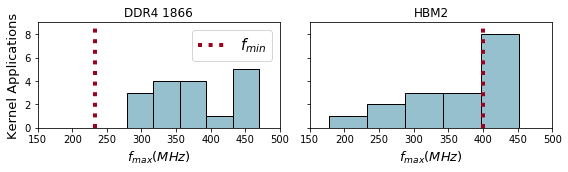

In [317]:
#Frequency graph
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']

frq_appMX=[417.71,
433.6,
327.76,
327.76,
373.83,
439.75,
443.26,
423.9,
320.2,
397.45,
452.2,
390.32,
268.38,
177.96,
446.03,
278.08,
354.35
]

frq_appGX=[
455,
373.27,
379.9,
379.9,
298.08,
437.5,
470,
400,
327.22,
458.3,
440.3,
357.39,
295.5,
325.94,
350,
279.16,
342.11]

n_bins= 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True,figsize=(8,2.5))



axs[0].hist(frq_appGX, bins=n_bins,color=colorcycle[1],edgecolor='black')



axs[0].set_xlabel(r'$f_{max}(MHz)$',fontsize=13)
axs[0].set_ylabel("Kernel Applications",fontsize=13)
axs[0].set_title("DDR4 1866")
axs[0].set_ylim([0,89])
axs[0].set_xlim([150,500])

# We can set the number of bins with the `bins` kwarg
axs[1].hist(frq_appMX, bins=n_bins, color=colorcycle[1],edgecolor='black')
axs[1].axvline(x=400, color='#9A031E', linestyle=':', linewidth=4)

axs[1].set_xlabel(r'$f_{max}(MHz)$',fontsize=13
                 )
axs[1].set_title("HBM2")
axs[1].set_ylim([0,9])
axs[1].set_xlim([150,500])

axs[0].axvline(x=233, color='#9A031E', linestyle=':', linewidth=4)

axs[0].legend([r'$f_{min}$'],fontsize=15);

plt.savefig('frq_apps.pdf', bbox_inches="tight")
#axs[1].set_ylabel("number of apps")

16
16


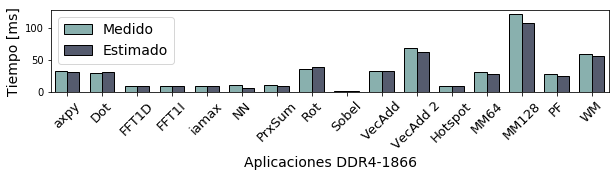

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

colorcycle = ['#264653','#2a9d8f','#89b0ae','#555b6e','#beb9b5','#dfBA87']

MTime_GX=[
31.9,
29.4,
9.5,
9.5,
9.2,
10.3,
10.0,
35.7,
1.9,
33.3,
67.9,
9.7,
31.2,
121.2,
27.6,
59.8
]

ETime_GX=[
31.5,
31.5,
8.8,
8.8,
8.8,
6.5,
9.0,
39.5,
2.0,
33.2,
63.0,
8.8,
27.9,
107.8,
25.4,
55.8
]
labels = ['axpy','Dot', 'FFT1D', 'FFT1I', 'iamax', 'NN', 'PrxSum', 
          'Rot', 'Sobel','VecAdd', 'VecAdd 2', 'Hotspot', 'MM64',
          'MM128','PF', 'WM']
x = np.arange(len(labels)) 
print (len(labels))
print (len(MTime_GX))
width = 0.35  # the width of the bars
fig, axs = plt.subplots(figsize=(10,1.5))
rects1 = axs.bar(x - width/2, MTime_GX, width, label='Medido', color=colorcycle[2],edgecolor='black')
rects2 = axs.bar(x + width/2, ETime_GX, width, label='Estimado', color=colorcycle[3], edgecolor='black')

axs.set_xticks(x)
axs.set_xlim([-0.45,15.5])
axs.set_xticklabels(labels, rotation=45,fontsize=13)
axs.set_xlabel("Aplicaciones DDR4-1866",fontsize=14)
axs.set_ylabel("Tiempo [ms]",fontsize=14)
axs.legend(fontsize=14)
plt.savefig('i3A_GX.pdf', bbox_inches="tight")
#axs[1].set_ylabel("number of apps")

16
16


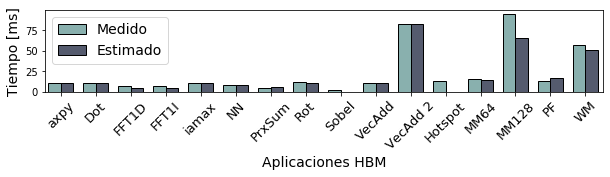

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

colorcycle = ['#264653','#2a9d8f','#89b0ae','#555b6e','#beb9b5','#dfBA87']

MTime_MX=[
11.2,
11.2,
6.6,
6.6,
11.2,
8.7,
5.2,
11.5,
1.7,
11.2,
82.6,
12.8,
15.7,
94.4,
13.8,
0.44*128.6
]

ETime_MX=[
10.2,
10.2,
5.1,
5.1,
10.2,
8.0,
5.8,
10.5,
0, 
10.2,
81.9,
0, 
10.4*1.33,
41.9*1.55,
16.5,
0.4*128.6
]
labels = ['axpy','Dot', 'FFT1D', 'FFT1I', 'iamax', 'NN', 'PrxSum', 
          'Rot', 'Sobel','VecAdd', 'VecAdd 2', 'Hotspot', 'MM64',
          'MM128','PF', 'WM']
x = np.arange(len(labels)) 
print (len(labels))
print (len(MTime_MX))
width = 0.35  # the width of the bars
fig, axs = plt.subplots(figsize=(10,1.5))
rects1 = axs.bar(x - width/2, MTime_MX, width, label='Medido', color=colorcycle[2],edgecolor='black')
rects2 = axs.bar(x + width/2, ETime_MX, width, label='Estimado', color=colorcycle[3], edgecolor='black')

axs.set_xticks(x)
axs.set_xlim([-0.45,15.5])
axs.set_xticklabels(labels, rotation=45,fontsize=13)
axs.set_xlabel("Aplicaciones HBM",fontsize=14)
axs.set_ylabel("Tiempo [ms]",fontsize=14)
axs.legend(fontsize=14)
plt.savefig('i3A_MX.pdf', bbox_inches="tight")
#axs[1].set_ylabel("number of apps")